In [1]:
import re

In [2]:

import os
master_array = [] #append results to array to create data frame
folder = './Friends/'

for filename in os.listdir(folder):
  if filename.endswith('.txt'):
    pattern = re.compile(r'(?<=\d)\s')
    name = filename.strip('.txt')#obtain the season and episodes
    split_name = re.split(pattern, name)
    seasonep = split_name[0]
    if '-' in seasonep:
      pattern = re.compile(r'-')
      split_seasons = re.split(pattern, seasonep)
      x = split_seasons[0]
      y = split_seasons[1]
      pattern = re.compile(r'E')
      x_split = re.split(pattern, x)
      y_split = re.split(pattern, y)
      season = x_split[0]
      episode = (int(x_split[1]) + int(y_split[1]))/2
      episode_name = split_name[1]
    else:
      pattern = re.compile(r'E')
      split_season = re.split(pattern, seasonep)   
      season = split_season[0]
      # print(season)
      episode = split_season[1]
      episode_name = split_name[1]

    with open(folder + filename, 'r', encoding='UTF-8') as f:
      lines = f.readlines() #read the script file
      pattern = re.compile(r'\w+:\s') # store the regex
      for line in lines:
        result = re.match(pattern, line)
        if result is not None: # split the script where our pattern matched (pink dot)
          split_line = line.split(':')
          character = split_line[0]
          speech = split_line[1].strip()
          line= [seasonep, season, episode, episode_name, character, speech]
          master_array.append(line)
        else:
          pass


In [3]:
import pandas as pd

friends = pd.DataFrame(master_array, columns=['id', 'season', 'episode', 'episode_name', 'character', 'line'])

In [4]:
friends.sample(20)

,id,season,episode,episode_name,character,line
14215,S03E14,S03,14,Phoebes Ex-Partner,Leslie,"Well, I y'know, I was just, umm, I was just th..."
58485,S10E17-S10E18,S10,17.5,The Last One Part I II,Phoebe,"Uhm, actually no. No, you've... You have to ge..."
8485,S02E12-S02E13,S02,12.5,The Superbowl,MONICA,"Well, bye for me too. [kisses him]"
11095,S03E01,S03,01,The Princess Leia Fantasy,Rachel,Why?
10553,S02E22,S02,22,The Two Parties,RACHEL,Oh ok.
4623,S01E20,S01,20,The Evil Orthodontis,Monica,Just like you told her you did! (Chandler glar...
17652,S04E02,S04,02,The Ca,Chip,"...and then Zana, just let one rip!! (laughs h..."
10969,S02E24,S02,24,Barry And Mindys Wedding,ROSS,"Most of you don't know me, I'm Rachel's boyfri..."
57672,S10E15,S10,15,Estelle Dies,Rachel,"Oh, well, she’s asleep now. Stop forcing that ..."
30093,S06E06,S06,06,On The Last Nigh,Joey,No-no! No way! Joey Tribbiani does not take ch...


In [5]:
# Ensure all names are refering to the correct person
print(sorted(friends['character'].unique()))
friends['character'].replace({'CHAN':'Chandler','CHANDLER':'Chandler', 'Chandlers':'Chandler',
                    'JOEY':'Joey',
                    'MNCA':'Monica','MONICA':'Monica',
                    'PHOE':'Phoebe','PHOEBE':'Phoebe', 'Pheebs':'Phoebe',
                    'Rache':'Rachel','RACHEL':'Rachel', 'RACH':'Rachel',
                    'ROSS':'Ross'},inplace=True)

['ALISON', 'ALL', 'AMBER', 'AMGER', 'Actor', 'Adrienne', 'Alan', 'Alex', 'Alice', 'All', 'Allesandro', 'Amanda', 'Amy', 'Anchorwoman', 'Andrea', 'Angela', 'Annabelle', 'Announcer', 'Arthur', 'Ashley', 'Assistant', 'Attendant', 'Aurora', 'BARRY', 'BEN', 'BILL', 'BOTH', 'BOYS', 'Ballerina', 'Bandleader', 'Barry', 'Ben', 'Benjamin', 'Bernice', 'Bill', 'Billy', 'Bitsy', 'Bob', 'Bobby', 'Bonnie', 'Boss', 'Both', 'Boy', 'Brenda', 'Burt', 'CAROL', 'CAROLINE', 'CHAN', 'CHANDLER', 'Cailin', 'Caitlin', 'Carl', 'Carol', 'Casey', 'Cashier', 'Cassie', 'Catherine', 'Cecilia', 'Celia', 'Chandler', 'Chandlers', 'Charlie', 'Cheryl', 'Chip', 'Chloe', 'Claudia', 'Clerk', 'Cliff', 'Clown', 'Colleen', 'Commercial', 'Conan', 'Cookie', 'Cop', 'Courtney', 'Cowgirl', 'Croupler', 'Customer', 'Customers', 'Cynthia', 'DIRECTOR', 'DOCTOR', 'DUNCAN', 'Dan', 'Dana', 'Danielle', 'Danny', 'Dave', 'David', 'Devon', 'Dina', 'Director', 'Dirk', 'Doctor', 'Don', 'Donny', 'Doug', 'Drew', 'EDDIE', 'ERICA', 'ERNIE', 'ESTELLE

In [6]:
friends['character'].value_counts()[:6]

Rachel      9285
Ross        9098
Chandler    8461
Monica      8386
Joey        8215
Phoebe      7473
Name: character, dtype: int64

<BarContainer object of 6 artists>

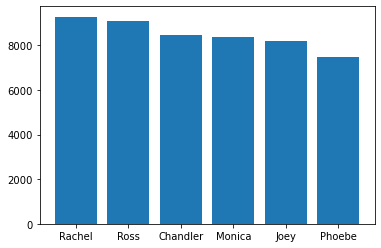

In [20]:
import matplotlib.pyplot as plt

x = ['Rachel', 'Ross', 'Chandler', 'Monica', 'Joey', 'Phoebe']
y = [i for i in friends['character'].value_counts().tolist()[:6]]


plt.bar(x,y)

In [21]:
def remove_stagedir(txt):
    ret = ''
    skip1c = 0
    skip2c = 0
    for i in txt:
        if i == '[':
            skip1c += 1
        elif i == '(':
            skip2c += 1
        elif i == ']' and skip1c > 0:
            skip1c -= 1
        elif i == ')'and skip2c > 0:
            skip2c -= 1
        elif skip1c == 0 and skip2c == 0:
            ret += i
    return ret
    
friends['line'] = friends.line.apply(remove_stagedir)

friends.sample(20)


,id,season,episode,episode_name,character,line
16328,S03E22,S03,22,The Screamer,Chandler,Hey! Can you take a duck and a chick to the t...
23911,S05E04,S05,04,Phoebe Hates PBS,Monica,Yeah.
17109,s03E25,s03,25,At The Beach,Joey,"Hey, you know what naked card game is never bo..."
50076,S09E12,S09,12,Phoebes Rats,Ross,"Joey, come on now, for me! Please, just-just t..."
23176,S05E01,S05,01,Ross Says Rachel,Joey,Thanks man.
51485,S09E17,S09,17,The Memorial Service,Mike,My friend Manny. I asked him to keep me away f...
44939,S08E14,S08,14,The Secret Close,Monica,Oh no! You weren’t supposed to see this!
37464,S07E10,S07,10,The Huliday Armadillo,Ross,"Well, how about this year, instead of Santa, w..."
32892,S06E17,S06,17,Unagi,Phoebe,"Oh, I love paper mache! What did you make?"
58110,S10E17-S10E18,S10,17.5,The Last One Part I II,Phoebe,YAY!


In [22]:
friends['season'] = friends['season'].apply(lambda x : re.sub(r'S0*', '', str(x)))
friends['season'] = friends['season'].apply(lambda x : re.sub(r's0*', '', str(x)))
friends['season'] = friends['season'].apply(lambda x : float(x))
friends['episode'] = friends['episode'].apply(lambda x : float(x))
friends.head()

,id,season,episode,episode_name,character,line
0,S01E01,1.0,1.0,Monica Gets A Roommate,Monica,There's nothing to tell! He's just some guy I ...
1,S01E01,1.0,1.0,Monica Gets A Roommate,Joey,"C'mon, you're going out with the guy! There's ..."
2,S01E01,1.0,1.0,Monica Gets A Roommate,Chandler,"All right Joey, be nice. So does he have a hu..."
3,S01E01,1.0,1.0,Monica Gets A Roommate,Phoebe,"Wait, does he eat chalk?"
4,S01E01,1.0,1.0,Monica Gets A Roommate,Phoebe,"Just, 'cause, I don't want her to go through w..."


In [23]:
print(friends.id.unique())
# there should be ten seasons
print(friends.season.unique())
# all numbers from 1 to 25 should be present
friends.episode.unique()

['S01E01' 'S01E02' 'S01E03' 'S01E04' 'S01E05' 'S01E06' 'S01E07' 'S01E08'
 'S01E09' 'S01E10' 'S01E11' 'S01E12' 'S01E13' 'S01E14' 'S01E15' 'S01E16'
 'S01E17' 'S01E18' 'S01E19' 'S01E20' 'S01E21' 'S01E22' 'S01E23' 'S01E24'
 'S02E01' 'S02E02' 'S02E03' 'S02E04' 'S02E05' 'S02E06' 'S02E07' 'S02E08'
 'S02E09' 'S02E10' 'S02E11' 'S02E12-S02E13' 'S02E14' 'S02E15' 'S02E16'
 'S02E17' 'S02E18' 'S02E19' 'S02E20' 'S02E21' 'S02E22' 'S02E23' 'S02E24'
 'S03E01' 'S03E02' 'S03E03' 'S03E04' 'S03E05' 'S03E06' 'S03E07' 'S03E08'
 'S03E09' 'S03E10' 'S03E11' 'S03E12' 'S03E13' 'S03E14' 'S03E15' 'S03E16'
 'S03E17' 'S03E18' 'S03E19' 'S03E20' 'S03E21' 'S03E22' 'S03E23' 'S03E24'
 's03E25' 'S04E01' 'S04E02' 'S04E03' 'S04E04' 'S04E05' 'S04E06' 'S04E07'
 'S04E08' 'S04E09' 'S04E10' 'S04E11' 'S04E12' 'S04E13' 'S04E14' 'S04E15'
 'S04E16' 'S04E17' 'S04E18' 'S04E19' 'S04E20' 'S04E21' 'S04E22' 'S04E23'
 'S05E01' 'S05E02' 'S05E03' 'S05E04' 'S05E05' 'S05E06' 'S05E07' 'S05E08'
 'S05E09' 'S05E10' 'S05E11' 'S05E12' 'S05E13' 'S05E14

array([ 1. ,  2. ,  3. ,  4. ,  5. ,  6. ,  7. ,  8. ,  9. , 10. , 11. ,
       12. , 13. , 14. , 15. , 16. , 17. , 18. , 19. , 20. , 21. , 22. ,
       23. , 24. , 12.5, 25. , 15.5, 23.5, 17.5])

In [24]:
friends['len'] = friends.line.apply(len)
friends.head()
friends['len'].sum()

3047509

In [25]:
groups = friends.groupby('id')

eplen = [groups.get_group(group)['len'].sum() for group in groups.groups]

In [26]:
print(eplen)

[16424, 10709, 12313, 12290, 12660, 12642, 10160, 8470, 12344, 12397, 10888, 11188, 10635, 10126, 12430, 12568, 10449, 11179, 12659, 13475, 9764, 10204, 11417, 12726, 11779, 10171, 11584, 12509, 13292, 11856, 11938, 12391, 12416, 14418, 11309, 22592, 11081, 8716, 10763, 12009, 12264, 13562, 15805, 11766, 11100, 12710, 11711, 11851, 15040, 12947, 14701, 12616, 11051, 11573, 12792, 13494, 13693, 13709, 13219, 11663, 12717, 13267, 14186, 14886, 13491, 12548, 12920, 13981, 11983, 12768, 14019, 10317, 11992, 10728, 9478, 11640, 12539, 12044, 13714, 13943, 12871, 12235, 12235, 13585, 13533, 12994, 12008, 12783, 13075, 11913, 10895, 11897, 13125, 23991, 11385, 12479, 10742, 12179, 12023, 12913, 12234, 9760, 11700, 13804, 11920, 13317, 11544, 12301, 13691, 12421, 12166, 13923, 13596, 13346, 15032, 14270, 23264, 11803, 14514, 15197, 12131, 14392, 13848, 14054, 13388, 13459, 12388, 14283, 13978, 12640, 13358, 25296, 11128, 13965, 14300, 12611, 14411, 12032, 13469, 26208, 13290, 11806, 13323, 131

<function matplotlib.pyplot.show(close=None, block=None)>

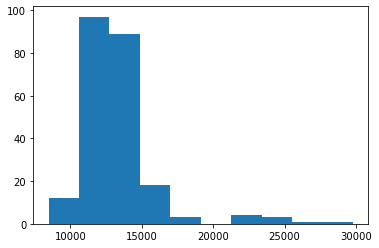

In [27]:
import matplotlib.pyplot as plt
plt.hist(eplen)
plt.show

### preprocessing friends

In [28]:
import os
import json
import glob
import shutil

# limit to only three tags in Universal Part-of-Speech tagset
allowed = set('ADJ NOUN VERB'.split())

In [29]:
# !python -m spacy validate
# !python -m spacy download nl_core_news_sm
# !python -m spacy download en_core_web_sm

In [30]:
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def prep(txt):
    toklst = []
    tokens = nlp(txt)
    if tokens:
        for t in tokens:
            if t.pos_ in allowed and t.is_alpha and not t.is_stop:
                toklst.append(t.text)
    return ' '.join(toklst).casefold()
                

c:\Users\Gebruiker\anaconda3\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
c:\Users\Gebruiker\anaconda3\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
c:\Users\Gebruiker\anaconda3\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


In [31]:
friends['prepped'] = friends.line.apply(prep)

In [33]:
friends.head()

,id,season,episode,episode_name,character,line,len,prepped
0,S01E01,1.0,1.0,Monica Gets A Roommate,Monica,There's nothing to tell! He's just some guy I ...,56,tell guy work
1,S01E01,1.0,1.0,Monica Gets A Roommate,Joey,"C'mon, you're going out with the guy! There's ...",80,going guy got wrong
2,S01E01,1.0,1.0,Monica Gets A Roommate,Chandler,"All right Joey, be nice. So does he have a hu...",73,nice hump hump hairpiece
3,S01E01,1.0,1.0,Monica Gets A Roommate,Phoebe,"Wait, does he eat chalk?",24,wait eat chalk
4,S01E01,1.0,1.0,Monica Gets A Roommate,Phoebe,"Just, 'cause, I don't want her to go through w...",79,want went


In [34]:
friends['len_prep'] = friends.prepped.apply(len)
friends.head()
friends['len_prep'].sum()

950404

In [35]:
import numpy as np
#calculate average episode length
friends_red = friends[friends['id'].str.isalnum() == True]
# print(friends_red['id'].unique())

grouped = friends_red.groupby('id')
print(np.mean(grouped['len_prep'].agg(sum)))

4099.700892857143


In [36]:
friends.to_csv('friends_per_line.tsv', sep='\t')

### ratings

In [37]:
import pandas as pd
friends = pd.read_csv('friends_per_line.tsv', sep='\t', index_col=0)
ratings = pd.read_csv('./Friends/friends_episodes_v3.csv')
ratings.head()
friends.head()

,id,season,episode,episode_name,character,line,len,prepped,len_prep
0,S01E01,1.0,1.0,Monica Gets A Roommate,Monica,There's nothing to tell! He's just some guy I ...,56,tell guy work,13
1,S01E01,1.0,1.0,Monica Gets A Roommate,Joey,"C'mon, you're going out with the guy! There's ...",80,going guy got wrong,19
2,S01E01,1.0,1.0,Monica Gets A Roommate,Chandler,"All right Joey, be nice. So does he have a hu...",73,nice hump hump hairpiece,24
3,S01E01,1.0,1.0,Monica Gets A Roommate,Phoebe,"Wait, does he eat chalk?",24,wait eat chalk,14
4,S01E01,1.0,1.0,Monica Gets A Roommate,Phoebe,"Just, 'cause, I don't want her to go through w...",79,want went,9


In [38]:
ratings.head()

,Year_of_prod,Season,Episode Number,Episode_Title,Duration,Summary,Director,Stars,Votes
0,1994,1,1,The One Where Monica Gets a Roommate: The Pilot,22,"Monica and the gang introduce Rachel to the ""r...",James Burrows,8.3,7440
1,1994,1,2,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,8.1,4888
2,1994,1,3,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,8.2,4605
3,1994,1,4,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,8.1,4468
4,1994,1,5,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,8.5,4438


In [39]:
friends_red = friends[friends['id'].str.isalnum() == True]
double_episodes = friends[friends['id'].str.isalnum() == False]
print(len(friends.groupby('id')))
print(len(friends_red.groupby('id')))
print(len(double_episodes.groupby('id')))
len(ratings)

228
224
4


236

In [40]:
friends.id.unique()

array(['S01E01', 'S01E02', 'S01E03', 'S01E04', 'S01E05', 'S01E06',
       'S01E07', 'S01E08', 'S01E09', 'S01E10', 'S01E11', 'S01E12',
       'S01E13', 'S01E14', 'S01E15', 'S01E16', 'S01E17', 'S01E18',
       'S01E19', 'S01E20', 'S01E21', 'S01E22', 'S01E23', 'S01E24',
       'S02E01', 'S02E02', 'S02E03', 'S02E04', 'S02E05', 'S02E06',
       'S02E07', 'S02E08', 'S02E09', 'S02E10', 'S02E11', 'S02E12-S02E13',
       'S02E14', 'S02E15', 'S02E16', 'S02E17', 'S02E18', 'S02E19',
       'S02E20', 'S02E21', 'S02E22', 'S02E23', 'S02E24', 'S03E01',
       'S03E02', 'S03E03', 'S03E04', 'S03E05', 'S03E06', 'S03E07',
       'S03E08', 'S03E09', 'S03E10', 'S03E11', 'S03E12', 'S03E13',
       'S03E14', 'S03E15', 'S03E16', 'S03E17', 'S03E18', 'S03E19',
       'S03E20', 'S03E21', 'S03E22', 'S03E23', 'S03E24', 's03E25',
       'S04E01', 'S04E02', 'S04E03', 'S04E04', 'S04E05', 'S04E06',
       'S04E07', 'S04E08', 'S04E09', 'S04E10', 'S04E11', 'S04E12',
       'S04E13', 'S04E14', 'S04E15', 'S04E16', 'S04E17'

In [41]:
def fuck(df):
    season = int(df[1])
    ep = int(df[2])
    df['match'] = str(season) + str(ep)
    return df

friends = friends.apply(fuck, axis=1)

In [42]:
ratings = ratings.apply(fuck, axis=1)
print(friends['match'][0])
print(ratings['match'][0])

11
11


## get text

In [154]:
from numpy import NaN

friends.sort_index(inplace=True)
ratings.sort_index(inplace=True)

groups = friends.groupby('id')
ratings["text"] = NaN
ratings["len in words"] = NaN
ratings["len_prep"] = NaN

for group in groups.groups:
    ep = groups.get_group(group)
    ep.reset_index(drop=True, inplace=True)
    matcher = ep['match'][0]
    # print(matcher)
    tekst = ep['prepped'].dropna()
    text = ' '.join(tekst)
    text = ' '.join(text.split())
    # print(text[:10])
    lenght = ep['len'].sum()

    lenght_prep = ep['len_prep'].sum()


    index = ratings[ratings['match'] == matcher].index
    print(index)
    ratings.iloc[index, 10] = text
    ratings.iloc[index, 11] = lenght
    ratings.iloc[index, 12] = lenght_prep

Int64Index([0], dtype='int64')
Int64Index([1], dtype='int64')
Int64Index([2], dtype='int64')
Int64Index([3], dtype='int64')
Int64Index([4], dtype='int64')
Int64Index([5], dtype='int64')
Int64Index([6], dtype='int64')
Int64Index([7], dtype='int64')
Int64Index([8], dtype='int64')
Int64Index([9], dtype='int64')
Int64Index([10], dtype='int64')
Int64Index([11], dtype='int64')
Int64Index([12], dtype='int64')
Int64Index([13], dtype='int64')
Int64Index([14], dtype='int64')
Int64Index([15], dtype='int64')
Int64Index([16], dtype='int64')
Int64Index([17], dtype='int64')
Int64Index([18], dtype='int64')
Int64Index([19], dtype='int64')
Int64Index([20], dtype='int64')
Int64Index([21], dtype='int64')
Int64Index([22], dtype='int64')
Int64Index([23], dtype='int64')
Int64Index([24], dtype='int64')
Int64Index([25], dtype='int64')
Int64Index([26], dtype='int64')
Int64Index([27], dtype='int64')
Int64Index([28], dtype='int64')
Int64Index([29], dtype='int64')
Int64Index([30], dtype='int64')
Int64Index([31], d

In [155]:
ratings.head()

,Year_of_prod,Season,Episode Number,Episode_Title,Duration,Summary,Director,Stars,Votes,match,text,len in words,len_prep
0,1994,1,1,The One Where Monica Gets a Roommate: The Pilot,22,"Monica and the gang introduce Rachel to the ""r...",James Burrows,8.3,7440,11,tell guy work going guy got wrong nice hump hu...,16424.0,5280.0
1,1994,1,2,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,8.1,4888,12,guys understand kissing important need know ki...,10709.0,3170.0
2,1994,1,3,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,8.2,4605,13,hi guys good walked subway said ouch said good...,12313.0,3689.0
3,1994,1,4,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,8.1,4468,14,omnipotent day want world peace hunger good th...,12290.0,4041.0
4,1994,1,5,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,8.5,4438,15,let big deal big deal amazing reach little man...,12660.0,3859.0


In [156]:
#the double episodes are "fixed" in a hacky way

indexes = ratings[ratings['text'].isna() ==True].index.to_list()
indexes2 = [index-1 for index in indexes]
indexes3 = indexes + indexes2
indexes3.sort()
ratings.iloc[indexes3, :]

,Year_of_prod,Season,Episode Number,Episode_Title,Duration,Summary,Director,Stars,Votes,match,text,len in words,len_prep
35,1996,2,12,The One After the Superbowl: Part 1,22,Ross goes to visit Marcel whilst on a trip to ...,Michael Lembeck,8.6,3723,212,commercial makes sad guy opens beer girls run ...,22592.0,7577.0
36,1996,2,13,The One After the Superbowl: Part 2,22,"Ross finds Marcel on the set of a new movie, w...",Michael Lembeck,8.8,3864,213,NaN,NaN,NaN
95,1998,4,23,The One with Ross's Wedding,30,Phoebe tries to help Rachel deal with her feel...,Kevin Bright,8.7,3343,423,guys hurry flight leaves hours time taxi traff...,23991.0,7413.0
96,1998,4,24,The One with Ross's Wedding,30,Phoebe tries to warn the gang that Rachel is c...,Kevin Bright,9.2,4217,424,NaN,NaN,NaN
119,1999,5,23,The One in Vegas: Part 1,22,The gang go to Las Vegas to visit Joey. Chandl...,Kevin Bright,8.8,3282,523,lazy touchie people entire world want talk lis...,23264.0,7039.0
120,1999,5,24,The One in Vegas: Part 2,22,Chandler and Monica reconcile and hastily deci...,Kevin Bright,9.1,3726,524,NaN,NaN,NaN
135,2000,6,15,The One That Could Have Been,30,When Rachel hears Barry and Mindy are getting ...,Michael Lembeck,8.5,3097,615,guys guess getting divorce matter hear divorce...,25296.0,7689.0
136,2000,6,16,The One That Could Have Been,30,The gang continue to think about how different...,Michael Lembeck,8.5,3037,616,NaN,NaN,NaN
144,2000,6,24,The One with the Proposal,30,Chandler's plan to propose to Monica at dinner...,Kevin Bright,8.8,3065,624,beautiful engagement ring know bought tonight ...,26208.0,8384.0
145,2000,6,25,The One with the Proposal,30,Chandler continues to pretend to hate the idea...,Kevin Bright,9.3,4186,625,NaN,NaN,NaN


In [159]:
#the above are all double episodes, with the text
for index in indexes2:
    tekst = ratings.iloc[index, 10].split()
    lenwords = ratings.iloc[index, 11]/2
    lenprep = ratings.iloc[index, 12]/2
    ratings.iloc[index, 10] = ' '.join(tekst[:int(len(tekst)/2)])
    ratings.iloc[index, 11] = lenwords
    ratings.iloc[index, 12] = lenprep
    ratings.iloc[index+1, 10] = ' '.join(tekst[int(len(tekst)/2):])
    ratings.iloc[index+1, 11] = lenwords
    ratings.iloc[index+1, 12] = lenprep

In [160]:
ratings.iloc[indexes3, :]

,Year_of_prod,Season,Episode Number,Episode_Title,Duration,Summary,Director,Stars,Votes,match,text,len in words,len_prep
35,1996,2,12,The One After the Superbowl: Part 1,22,Ross goes to visit Marcel whilst on a trip to ...,Michael Lembeck,8.6,3723,212,commercial makes sad guy opens beer girls run ...,11296.0,3788.5
36,1996,2,13,The One After the Superbowl: Part 2,22,"Ross finds Marcel on the set of a new movie, w...",Michael Lembeck,8.8,3864,213,closed set know friends monkey good morning pa...,11296.0,3788.5
95,1998,4,23,The One with Ross's Wedding,30,Phoebe tries to help Rachel deal with her feel...,Kevin Bright,8.7,3343,423,guys hurry flight leaves hours time taxi traff...,11995.5,3706.5
96,1998,4,24,The One with Ross's Wedding,30,Phoebe tries to warn the gang that Rachel is c...,Kevin Bright,9.2,4217,424,think miss birds babies babies miss pizza guy ...,11995.5,3706.5
119,1999,5,23,The One in Vegas: Part 1,22,The gang go to Las Vegas to visit Joey. Chandl...,Kevin Bright,8.8,3282,523,lazy touchie people entire world want talk lis...,11632.0,3519.5
120,1999,5,24,The One in Vegas: Part 2,22,Chandler and Monica reconcile and hastily deci...,Kevin Bright,9.1,3726,524,gon believe found identical hand twin identica...,11632.0,3519.5
135,2000,6,15,The One That Could Have Been,30,When Rachel hears Barry and Mindy are getting ...,Michael Lembeck,8.5,3097,615,guys guess getting divorce matter hear divorce...,12648.0,3844.5
136,2000,6,16,The One That Could Have Been,30,The gang continue to think about how different...,Michael Lembeck,8.5,3037,616,opportunities mean waiting perfect guy seeing ...,12648.0,3844.5
144,2000,6,24,The One with the Proposal,30,Chandler's plan to propose to Monica at dinner...,Kevin Bright,8.8,3065,624,beautiful engagement ring know bought tonight ...,13104.0,4192.0
145,2000,6,25,The One with the Proposal,30,Chandler continues to pretend to hate the idea...,Kevin Bright,9.3,4186,625,complement chef better great seeing night good...,13104.0,4192.0


<AxesSubplot:ylabel='Frequency'>

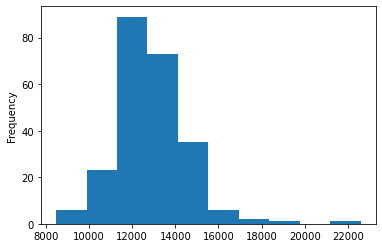

In [162]:
ratings['len in words'].plot(kind='hist')

### number of character lines

In [ ]:
# groups = friends.groupby('id')

# for epi in groups.groups:
#     ep = groups.get_group(epi)
#     groups2 = ep.groupby('character')
#     for group in groups2.get_group(group):
#         if group in ['Rachel', 'Ross', 'Chandler', 'Monica', 'Joey', 'Phoebe']:
#             char = group['len in words'].apply(sum)
#             total

<AxesSubplot:>

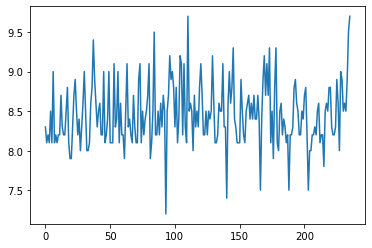

In [164]:
ratings['Stars'].plot()

In [168]:
stars = ratings['Stars']
t_average = stars.rolling(window=5).mean()

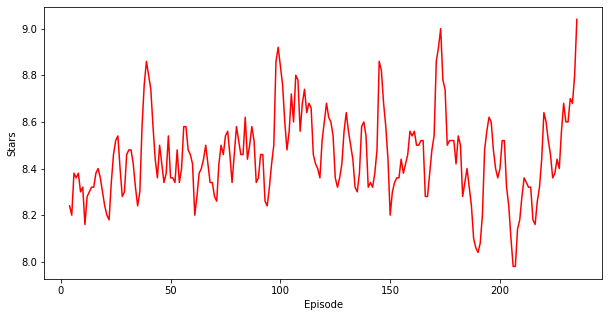

In [170]:
plt.figure(figsize=(10, 5))
plt.plot(t_average, 'r-', label='Running average stars per 5 episodes')
plt.ylabel('Stars')
plt.xlabel('Episode')
plt.show()

<AxesSubplot:>

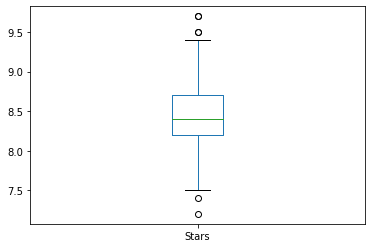

In [166]:
ratings['Stars'].plot(kind='box')

In [171]:
ratings.to_csv('friends_text_ratings.csv')